# Logistic Regression

* Logistic regression is a machine learning algorithm used for classification problems. It is a supervised learning algorithm that can be used to predict the probability of occurrence of an event. The logistic regression algorithm is used to map the input data to a probability, unlike linear regression which is used to map the input data to continuous output values. The output of the logistic regression model is a probability value between 0 and 1. The output represents the probability that the class of the input data is 1. 

The input data is mapped to a probability using the sigmoid function. The sigmoid function, also called as logistic function, is a mathematical function that maps values (sum of weighted input) from -infinity to +infinity to values between 0 and 1. The sigmoid function that represents the hypothesis is defined as:

σ(z)=11+e−z

The value of z in sigmoid function represents the weighted sum of input values and can be written as the following:

z=θTx

Where θ represents the parameters. 

The output of the hypothetical model (sigmoid function output) is always between 0 and 1. If the output is close to 0, it means that the event is less likely to occur. If the output is close to 1, it means that the event is more likely to happen. For example, if the value of logistic regression model (represented using sigmoid function) is 0.8, it represents that the probability that the event will occur is 0.8 given a particular set of parameters learned using cost function optimization. For any new value X, the output of the above function will be used for making the prediction. *

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.3)

In [2]:
df = pd.read_csv('Invistico_Airline.csv')

In [3]:
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [4]:
    df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [5]:
df.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [6]:
df.isnull().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

# Process The Catagrical Data or Dummy

In [7]:
m=(df.dtypes == 'object')
object_col=list(m[m].index)
print('categorical variables: ')
print(object_col)


categorical variables: 
['satisfaction', 'Gender', 'Customer Type', 'Type of Travel', 'Class']


In [8]:
for x in object_col :
    print('unique values in ',x,' column : ' , df[x].unique())

unique values in  satisfaction  column :  ['satisfied' 'dissatisfied']
unique values in  Gender  column :  ['Female' 'Male']
unique values in  Customer Type  column :  ['Loyal Customer' 'disloyal Customer']
unique values in  Type of Travel  column :  ['Personal Travel' 'Business travel']
unique values in  Class  column :  ['Eco' 'Business' 'Eco Plus']


In [9]:
df = pd.get_dummies(df, columns=['satisfaction', 'Gender', 'Customer Type'
                                 , 'Type of Travel', 'Class'], drop_first=True)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Age                                129880 non-null  int64  
 1   Flight Distance                    129880 non-null  int64  
 2   Seat comfort                       129880 non-null  int64  
 3   Departure/Arrival time convenient  129880 non-null  int64  
 4   Food and drink                     129880 non-null  int64  
 5   Gate location                      129880 non-null  int64  
 6   Inflight wifi service              129880 non-null  int64  
 7   Inflight entertainment             129880 non-null  int64  
 8   Online support                     129880 non-null  int64  
 9   Ease of Online booking             129880 non-null  int64  
 10  On-board service                   129880 non-null  int64  
 11  Leg room service                   1298

# Feature Scaling

In [11]:
from sklearn.preprocessing import StandardScaler
stand= StandardScaler()

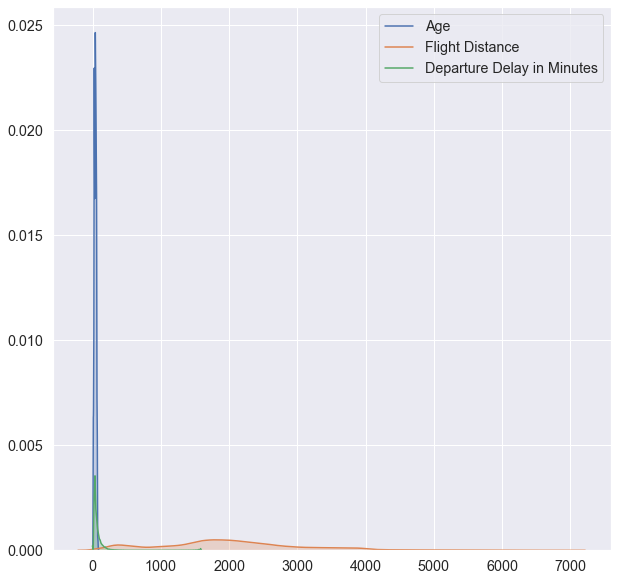

In [12]:
sns.kdeplot(df['Age'], shade=True)
sns.kdeplot(df['Flight Distance'], shade=True)
sns.kdeplot(df['Departure Delay in Minutes'], shade=True)



In [13]:
for column in ['Age','Flight Distance','Departure Delay in Minutes']:
    df[column] = stand.fit_transform(df[column].values.reshape(-1,1))

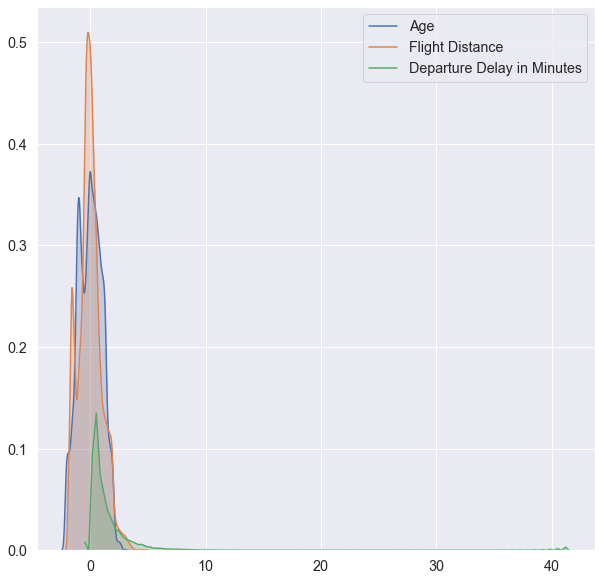

In [14]:
sns.kdeplot(df['Age'], shade=True)
sns.kdeplot(df['Flight Distance'], shade=True)
sns.kdeplot(df['Departure Delay in Minutes'], shade=True)


# Data Split to Train and Test Sets

In [15]:
x =df.drop(['Arrival Delay in Minutes','satisfaction_satisfied'], axis = 1)

In [16]:
y = df.iloc[: , 18:19].values


In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# Fitting Logistic Regression 

In [18]:
from sklearn.linear_model import LogisticRegression
classfier = LogisticRegression(solver='liblinear', random_state=1)
classfier.fit(x_train , y_train.ravel())


LogisticRegression(random_state=1, solver='liblinear')

In [19]:
y_pred = classfier.predict(x_test)

In [20]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classfier.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.84


In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 9662  2142]
 [ 2075 12097]]


In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82     11804
           1       0.85      0.85      0.85     14172

    accuracy                           0.84     25976
   macro avg       0.84      0.84      0.84     25976
weighted avg       0.84      0.84      0.84     25976



In [23]:
#from matplotlib.colors import ListedColormap
#x_set , y_set = x_train , y_train
#x1,x2 = np.meshgrid(np.arange(start = x_set[:,0].min()-1 ,stop = x_set[:,0].max()+1,step = 0.01),
#                    np.arange(start = x_set[:,1].min()-1 ,stop = x_set[:,1].max()+1,step = 0.01))
#plt.contourf(x1,x2,classfier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
#             alpha=0.75,cmap= listedcolormap(('red','green')))
#plt.xlim(x1.min(),x1.max())
#plt.ylim(x2.min(),x2.max())
#for i,j in enumerate(np.unique(y_set)):
#    plt.scatter(x_set[y_set == j,0], x_set[y_set == j,1] ,
#                c=listedcolormap(('red','green'))(i),label =j )
#plt.title('classifier (training set)')
#plt.legend()
#plt.show()

# K-NN 

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier =KNeighborsClassifier(n_neighbors=7 , metric= 'manhattan', p=2)
knn_classifier.fit(x_train,y_train.ravel())
knn_y_pred = knn_classifier.predict(x_test)


In [25]:
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn_classifier.score(x_test, y_test)))

Accuracy of K-NN classifier on test set: 0.94


In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, knn_y_pred)
print(confusion_matrix)

[[11100   704]
 [  970 13202]]


In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, knn_y_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93     11804
           1       0.95      0.93      0.94     14172

    accuracy                           0.94     25976
   macro avg       0.93      0.94      0.94     25976
weighted avg       0.94      0.94      0.94     25976



# SVM

In [28]:
from sklearn.svm import SVC
svm_classifier =SVC(kernel='rbf',random_state = 0 )
svm_classifier.fit(x_train,y_train.ravel())
svm_y_pred = svm_classifier.predict(x_test)


In [29]:
print('Accuracy of SVM classifier on test set: {:.2f}'.format(svm_classifier.score(x_test, y_test)))

Accuracy of SVM classifier on test set: 0.93


In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, svm_y_pred)
print(confusion_matrix)

[[10965   839]
 [  949 13223]]


In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test, svm_y_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92     11804
           1       0.94      0.93      0.94     14172

    accuracy                           0.93     25976
   macro avg       0.93      0.93      0.93     25976
weighted avg       0.93      0.93      0.93     25976



# Naive_bayes

In [32]:
from sklearn.naive_bayes import GaussianNB
NB_classifier =GaussianNB()
NB_classifier.fit(x_train,y_train.ravel())
NB_y_pred = NB_classifier.predict(x_test)

In [33]:
print('Accuracy of Naive_bayes classifier on test set: {:.2f}'.format(NB_classifier.score(x_test, y_test)))

Accuracy of Naive_bayes classifier on test set: 0.82


In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, NB_y_pred)
print(confusion_matrix)

[[ 9517  2287]
 [ 2308 11864]]


In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test, NB_y_pred))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81     11804
           1       0.84      0.84      0.84     14172

    accuracy                           0.82     25976
   macro avg       0.82      0.82      0.82     25976
weighted avg       0.82      0.82      0.82     25976



# Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier
DT_classifier =DecisionTreeClassifier(criterion='entropy')
DT_classifier.fit(x_train,y_train.ravel())
DT_y_pred = DT_classifier.predict(x_test)

In [37]:
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(DT_classifier.score(x_test, y_test)))

Accuracy of Decision Tree classifier on test set: 0.94


In [38]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, DT_y_pred)
print(confusion_matrix)

[[11009   795]
 [  753 13419]]


In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test, DT_y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93     11804
           1       0.94      0.95      0.95     14172

    accuracy                           0.94     25976
   macro avg       0.94      0.94      0.94     25976
weighted avg       0.94      0.94      0.94     25976



# Random Forest 

In [40]:
from sklearn.ensemble import RandomForestClassifier
RF_classifier =RandomForestClassifier(n_estimators = 150 ,criterion='entropy')
RF_classifier.fit(x_train,y_train.ravel())
RF_y_pred = RF_classifier.predict(x_test)

In [41]:
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(RF_classifier.score(x_test, y_test)))

Accuracy of Random Forest classifier on test set: 0.96


In [42]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, RF_y_pred)
print(confusion_matrix)

[[11410   394]
 [  652 13520]]


In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test, RF_y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     11804
           1       0.97      0.95      0.96     14172

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976

